In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [47]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [48]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [49]:
from keras.models import load_model

class Meso4Improved(Classifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(lr=learning_rate)
        self.model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    def init_model(self): 
        x_input = Input(shape=(image_dimensions['height'], image_dimensions['width'], image_dimensions['channels']))
        
        x = Conv2D(8, (3, 3), padding='same')(x_input)
        x = BatchNormalization()(x)
        x = PReLU()(x)
        x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
        
        x = Conv2D(8, (5, 5), padding='same')(x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
        x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
        
        x = Conv2D(16, (5, 5), padding='same')(x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
        x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
        
        x = Conv2D(16, (5, 5), padding='same')(x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
        x = MaxPooling2D(pool_size=(4, 4), padding='same')(x)
        
        x = Flatten()(x)
        x = Dropout(0.5)(x)
        x = Dense(16)(x)
        x = PReLU()(x)
        x = Dropout(0.5)(x)
        x_output = Dense(1, activation='sigmoid')(x)

        return Model(inputs=x_input, outputs=x_output)
    
    def update_weights(self, data, labels, epochs=1, batch_size=32):
        # Train the model using the provided data and labels
        history = self.model.fit(data, labels, epochs=epochs, batch_size=batch_size, verbose=1)
        return history
    
    def save_weights(self, path=r'C:\Users\suhru\OneDrive\Desktop\Github\Deepfake-_detection_app\weights\Meso4_DF'):
        # Save the model weights to the specified path
        self.model.save_weights(path)
        print("Weights saved successfully!")

# Example usage:



In [50]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4Improved()
meso.loadpath = r'./weights/Meso4_DF'


In [51]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(r'C:\Users\suhru\OneDrive\Desktop\Github\Deepfake-_detection_app\data'
   ,
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [52]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [53]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    r'C:\Users\suhru\OneDrive\Desktop\Github\Deepfake-_detection_app\data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 0s 283ms/step
Predicted likelihood: 0.5156
Actual label: 1
1/1 [==============================] - 0s 60ms/step

Correct prediction: True


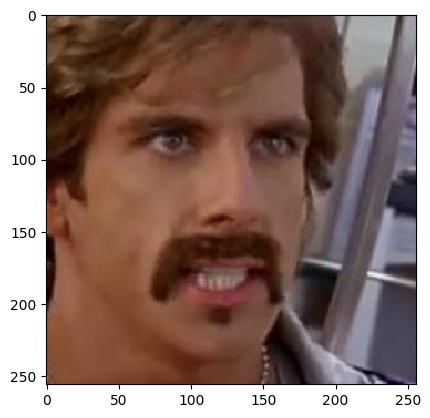

In [54]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [55]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [56]:
# Generating predictions on validation set, storing in separate lists
# Define the number of epochs for each batch
epochs_per_batch = 1

# Loop over the data generator
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    
    # Update model weights with the current batch
    history = meso.update_weights(X, y, epochs=epochs_per_batch, batch_size=len(y))
    
    # Extract the predicted probability from the model's output
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred) == y[0] and y[0] == 1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred) == y[0] and y[0] == 0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0] == 1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
    
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels) - 1:
        print("All", len(generator.labels), "predictions completed")


1/1 [==============================] - 0s 52ms/step
0  predictions completed.
1/1 [==============================] - 0s 78ms/step
1000  predictions completed.
1/1 [==============================] - 0s 118ms/step
2000  predictions completed.
1/1 [==============================] - 0s 169ms/step
3000  predictions completed.
1/1 [==============================] - 0s 218ms/step
4000  predictions completed.
1/1 [==============================] - 0s 290ms/step
5000  predictions completed.
1/1 [==============================] - 0s 458ms/step


KeyboardInterrupt: 

In [58]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

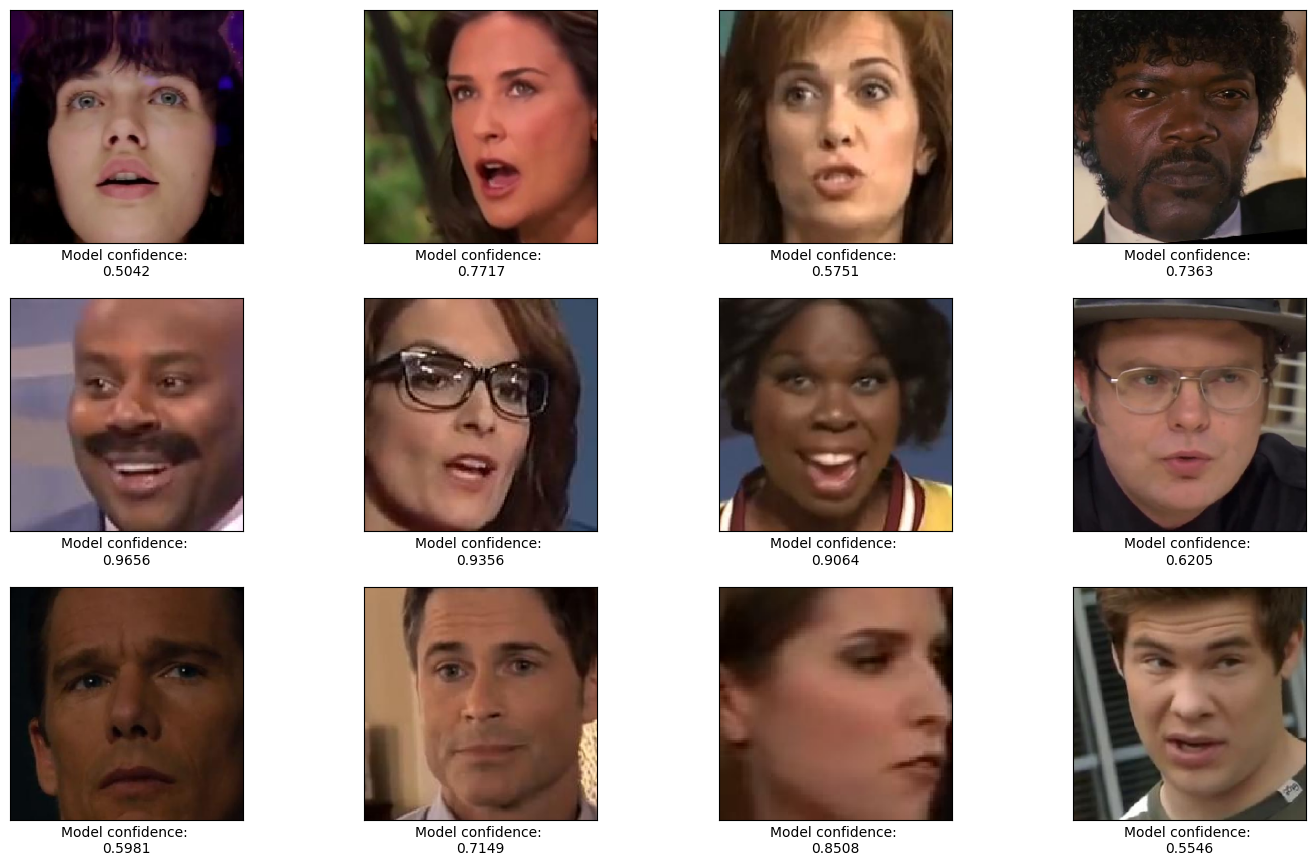

In [59]:
plotter(correct_real, correct_real_pred)

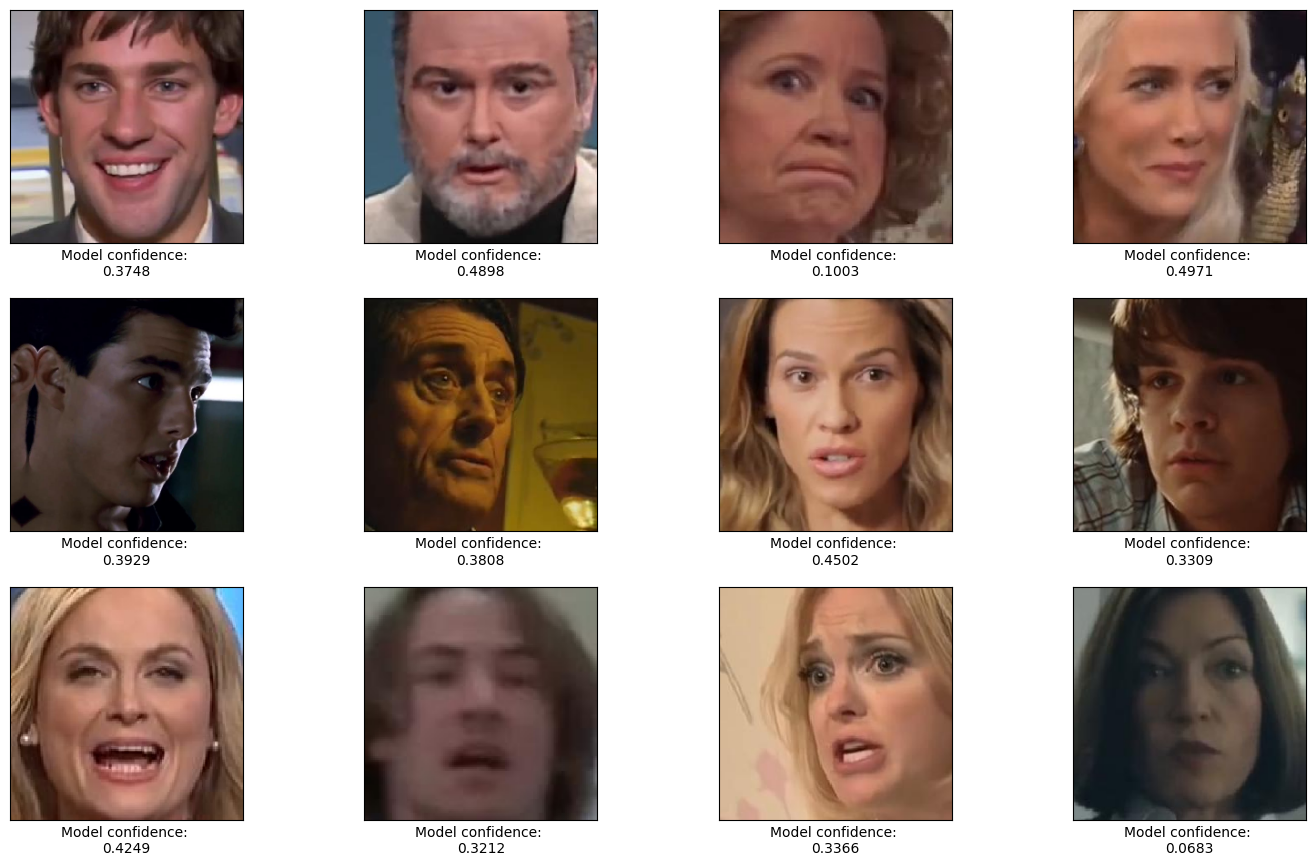

In [60]:
plotter(misclassified_real, misclassified_real_pred)

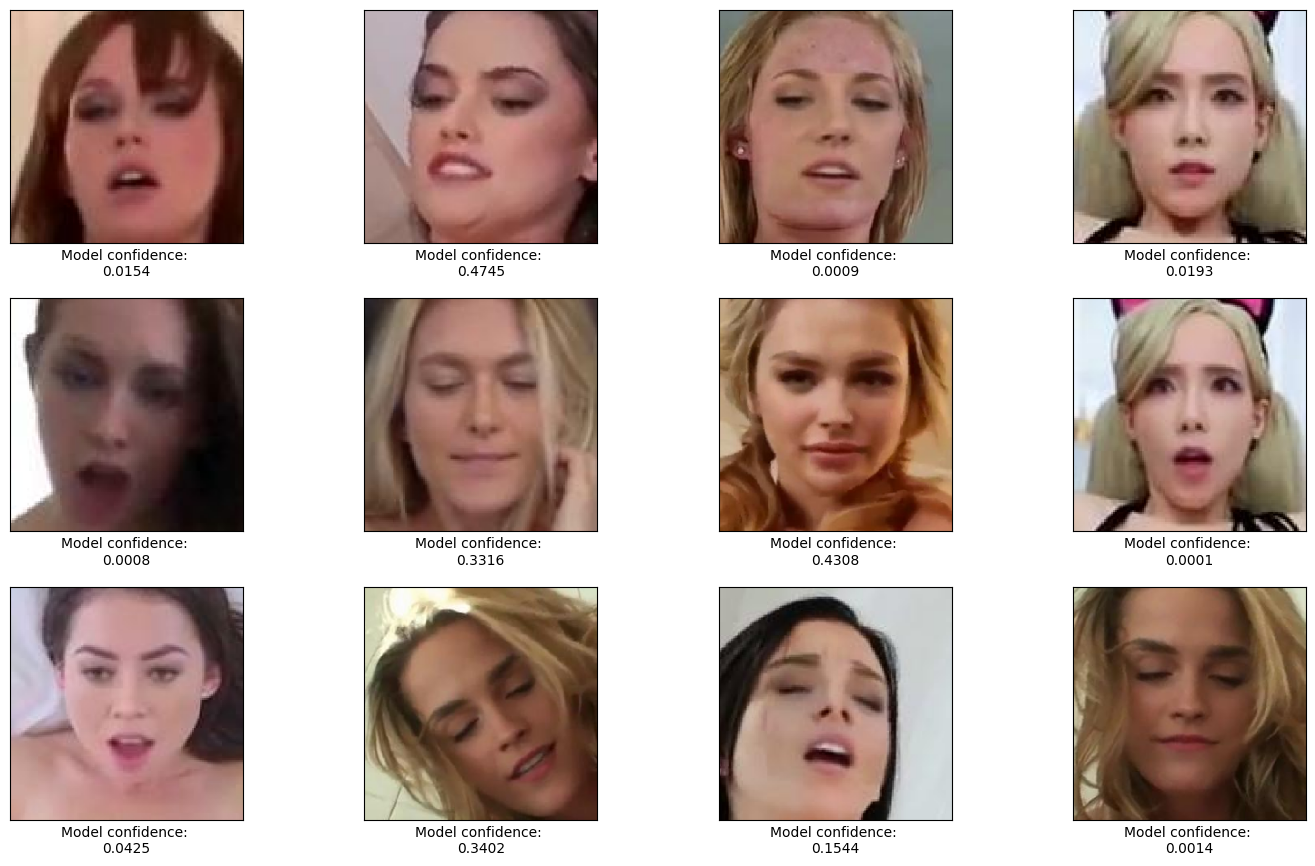

In [61]:
plotter(correct_deepfake, correct_deepfake_pred)

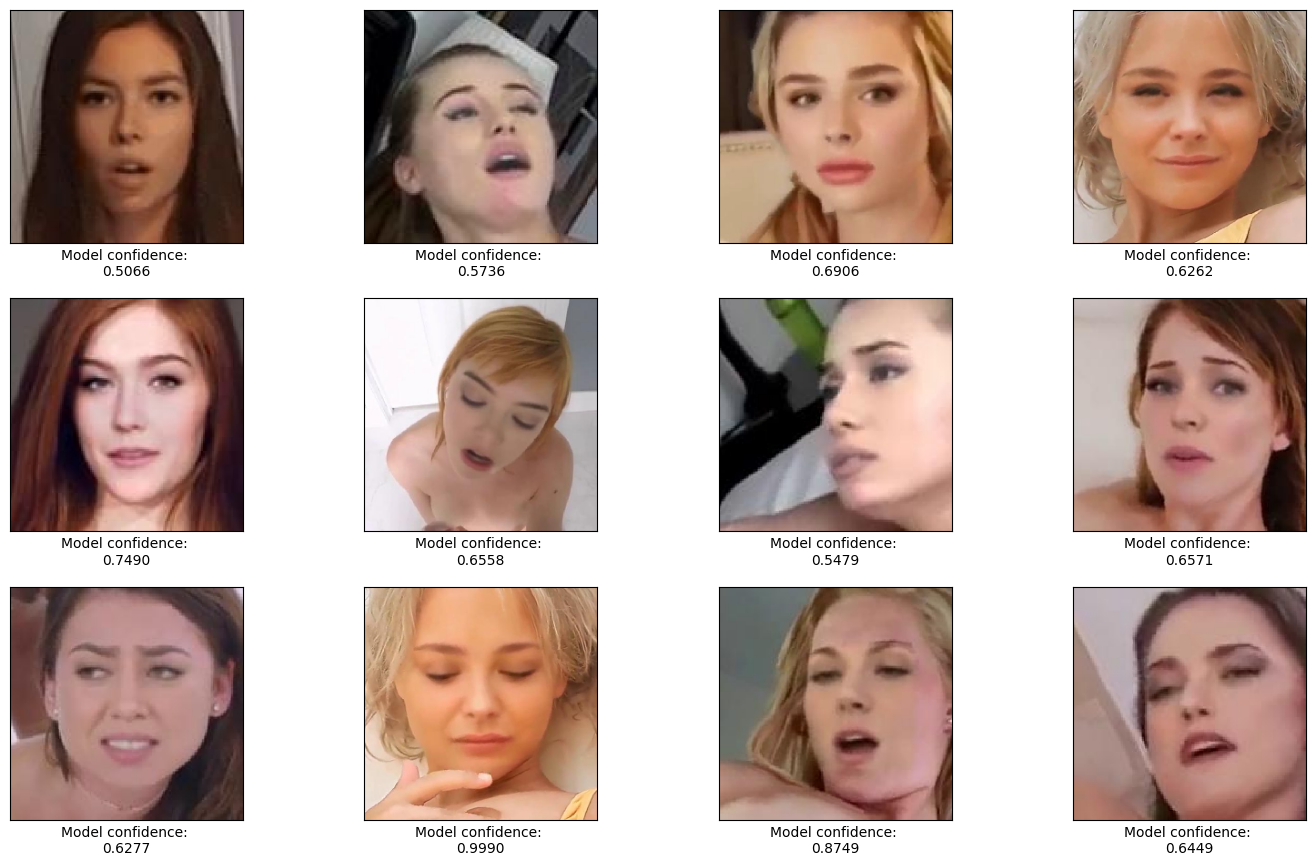

In [62]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)